# Tienda Online

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [35]:
#NO DESCOMENTAR ESTA CELDA
hypothesis=pd.read_csv('hypotheses_us.csv',sep=';')
orders=pd.read_csv('orders_us.csv')
visits=pd.read_csv('visits_us.csv')

### Descripción de los datos

In [36]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


In [37]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [38]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [39]:
hypothesis.sample(5)

,Hypothesis,Reach,Impact,Confidence,Effort
8,Launch a promotion that gives users discounts ...,1,9,9,5
5,Add a customer review page. This will increase...,3,2,2,3
3,Change the category structure. This will incre...,8,3,3,8
6,Show banners with current offers and sales on ...,5,3,8,3
2,Add product recommendation blocks to the store...,8,3,7,3


In [40]:
orders.sample(5)

,transactionId,visitorId,date,revenue,group
839,2368020497,2870367609,2019-08-21,25.7,B
966,914877599,1174537443,2019-08-10,10.0,A
348,2337370869,2016864191,2019-08-03,10.5,A
90,2010908098,1035424004,2019-08-22,25.9,B
388,1233825013,3160828523,2019-08-03,90.2,A


In [41]:
visits.sample(5)

,date,group,visits
19,2019-08-20,A,575
33,2019-08-03,B,509
11,2019-08-12,A,595
53,2019-08-23,B,546
37,2019-08-07,B,709


### Preprocesamiento de los datos

In [42]:
#para las tablas orders e hypotesis renombrar las columnas en minusculas y snake case 
hypothesis.columns = hypothesis.columns.str.lower()
print(hypothesis.columns)
orders.rename(columns={'transactionId':'transaction_id','visitorId':'visitor_id'}, inplace=True)
print(orders.columns)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'effort'], dtype='object')
Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')


In [43]:
#cambiamos los tipos de datos a fecha
orders['date']=pd.to_datetime(orders['date'])
visits['date']=pd.to_datetime(visits['date'])

In [44]:
#verificamos posibles duplicados
print(f" Hay {hypothesis.duplicated().sum()} duplicados en la tabla hypothesis.")
print(f" Hay {orders.duplicated().sum()} duplicados en la tabla orders.")
print(f" Hay {visits.duplicated().sum()} duplicados en la tabla visits")

 Hay 0 duplicados en la tabla hypothesis.
 Hay 0 duplicados en la tabla orders.
 Hay 0 duplicados en la tabla visits


In [45]:
#verificamos posibles valores ausentes
print("Valores ausentes por columna en hypotesis:\n", hypothesis.isna().sum())
print("\nValores ausentes por columna en orders:\n", orders.isna().sum())
print("\nValores ausentes por columna en visits:\n\n", visits.isna().sum())


Valores ausentes por columna en hypotesis:
 hypothesis    0
reach         0
impact        0
confidence    0
effort        0
dtype: int64

Valores ausentes por columna en orders:
 transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

Valores ausentes por columna en visits:

 date      0
group     0
visits    0
dtype: int64


### Parte 1. Priorizar hipótesis
Metodo ICE


In [46]:
hypothesis['ice']=hypothesis['impact']*hypothesis['confidence']/hypothesis['effort']
hypothesis[['hypothesis','ice']].sort_values(by='ice',ascending=False)

,hypothesis,ice
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


Método RICE

In [47]:
hypothesis['rice']=hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['effort']
hypothesis[['hypothesis','rice']].sort_values(by='rice',ascending=False)

,hypothesis,rice
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


Observaciones:La hipótesis "Add a subscription form to all the main pages" estaba en el puesto 3 en ICE y pasó a ser la número 1 en RICE.
Esto sugiere que tiene un alto alcance (impacta a muchos usuarios), lo que hace que su prioridad aumente en RICE.
Las hipótesis con menor alcance bajan en RICE

La hipótesis "Launch a promotion that gives users discounts" estaba en el puesto 1 en ICE, pero bajó al puesto 5 en RICE.
Esto indica que su alcance es más bajo en comparación con otras hipótesis.
Las hipótesis con bajo impacto o esfuerzo alto siguen con baja prioridad

"Change the background color on the main page" sigue en el último lugar en ambos rankings, lo que indica que tiene poco impacto y/o no es una optimización relevante.

### Parte 2. Análisis del test A/B

#### 1.Representación gráfica del ingreso acumulado por grupo.



In [48]:
#Crear un DataFrame con parejas de valores únicos de 'date' y 'group' de la tabla orders
datesGroups = orders[['date', 'group']].drop_duplicates()
# calculando los resultados de nuestra prueba todos los días hasta la fecha actual para las tablas orders y visits
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': pd.Series.nunique,
            'visitor_id': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visits[
        np.logical_and(
            visits['date'] <= x['date'], visits['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [49]:
#  fusionar las dos tablas en una
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


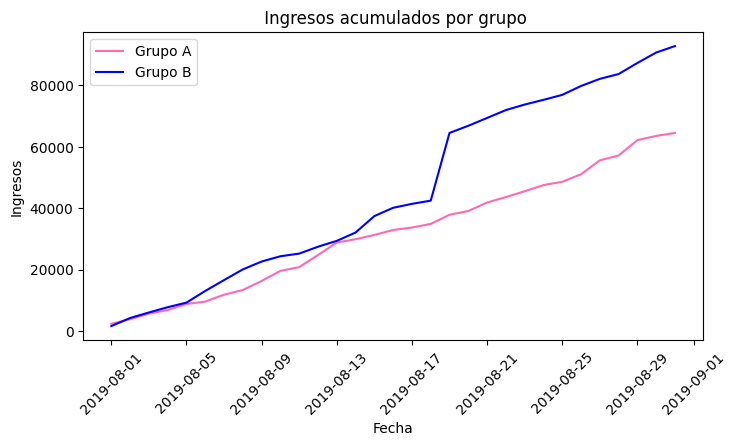

In [50]:
plt.figure(figsize=(8,4))
# Gráfico de ingresos del grupo A y B
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Grupo A', color='hotpink')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Grupo B', color='blue')
plt.xticks( rotation=45 ) 
plt.title(' Ingresos acumulados por grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingresos')
plt.legend()
plt.show()


Observaciones: Ambos grupos comienzan con ingresos bajos y aumentan progresivamente.
El Grupo B tiene un crecimiento más rápido que el Grupo A, especialmente alrededor del 17 de agosto, donde se observa un salto significativo en los ingresos.
A finales del período, el Grupo B tiene ingresos acumulados más altos que el Grupo A

#### 2. Representación gráfica del tamaño de pedido promedio acumulado por grupo.

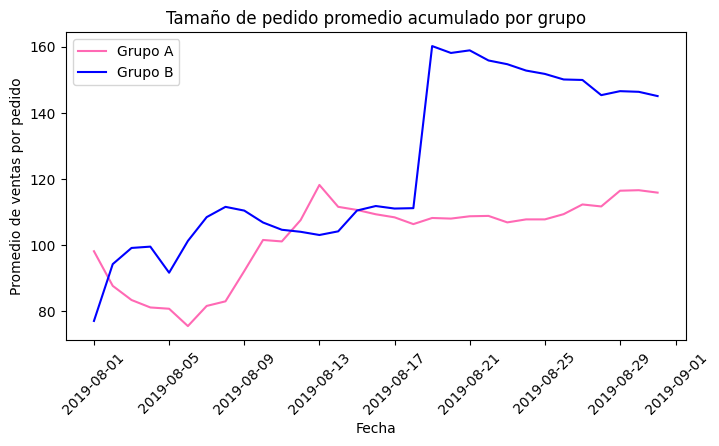

In [51]:
plt.figure(figsize=(8,4))
# Gráfico de pedidos del grupo A y B
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='Grupo A',color='hotpink')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='Grupo B', color='blue')
plt.xticks( rotation=45 ) 
plt.title('Tamaño de pedido promedio acumulado por grupo')
plt.xlabel('Fecha')
plt.ylabel('Promedio de ventas por pedido')
plt.legend()
plt.show()

Observaciones: El Grupo A Comienza con fluctuaciones en los primeros días, pero luego muestra un crecimiento estable a partir del 10 de agosto.

El Grupo B al inicio sigue una tendencia similar al Grupo A, pero después del 17 de agosto muestra un salto abrupto en el tamaño de pedido promedio y luego se estabiliza en un nivel superior al del Grupo A.


#### 3. Representación gráfica de  la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A

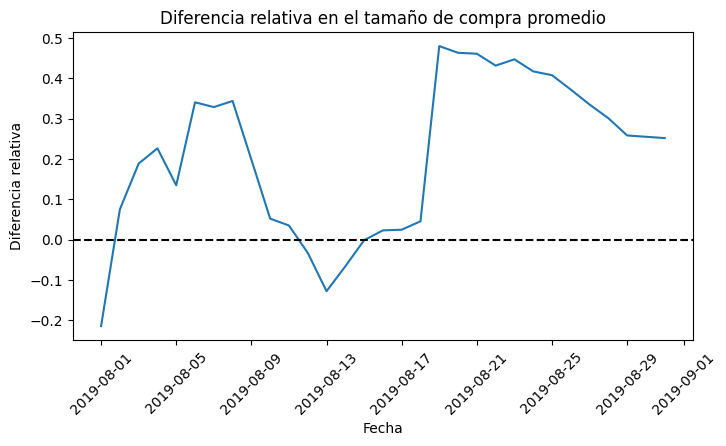

In [52]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(8,4))
# gráfico de diferencia relativa para los tamaños de compra promedio
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks( rotation=45 ) 
plt.title('Diferencia relativa en el tamaño de compra promedio')
plt.xlabel('Fecha')
plt.ylabel('Diferencia relativa')
plt.axhline(y=0, color='black', linestyle='--')


Observaciones: La diferencia relativa comienza en territorio negativo, lo que sugiere que, al inicio del periodo, el grupo A tenía un tamaño de compra promedio mayor que el grupo B. 
Durante el periodo del 5 al 17 de agosto, la diferencia relativa muestra una alta volatilidad. Esto indica que la dinámica entre los grupos A y B es inestable. El que la linea baje a valores negativos de nuevo, implica que el grupo A recupera parte del terreno perdido. 
El marcado pico positivo indica un cambio significativo. El grupo B experimenta un aumento sustancial en el tamaño de compra promedio, superando considerablemente al grupo A. 


#### 4. Cálculo de la tasa de conversión de cada grupo.


(np.float64(18109.0), np.float64(18140.0), np.float64(0.0), np.float64(0.05))

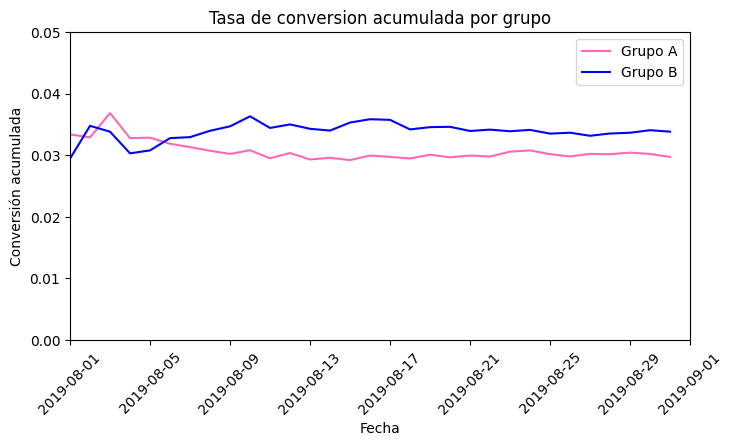

In [53]:
# calcular la conversión acumulada
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# seleccionar datos en el grupo A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# seleccionar datos en el grupo B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(8,4))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='Grupo A', color='hotpink')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='Grupo B',color='blue')
plt.xticks(rotation=45)
plt.title('Tasa de conversion acumulada por grupo')
plt.xlabel('Fecha')
plt.ylabel('Conversión acumulada')
plt.legend()
plt.axis([pd.to_datetime("2019-08-01"), pd.to_datetime('2019-09-01'), 0, 0.05])

Observaciones: 

El Grupo B muestra una tasa de conversión inicial ligeramente más alta que el Grupo A.
Ambos grupos experimentan fluctuaciones, pero el Grupo B muestra una tendencia ascendente más marcada en los primeros días.
Del 5 al 17 de Agosto Ambos grupos se estabilizan en sus tasas de conversión.
El Grupo B se mantiene consistentemente por encima del Grupo A, aunque la diferencia es relativamente pequeña.
Del 17 de Agosto en adelante  las tasas de conversión de ambos grupos se acercan aún más.
Ambos grupos muestran una ligera tendencia a la baja hacia el final del periodo.
El grupo B se mantiene ligeramente superior al grupo A, pero la diferencia es muy pequeña.

#### 5. Dispersión del número de pedidos por usuario.

(np.float64(18109.0), np.float64(18140.0), np.float64(-0.5), np.float64(0.5))

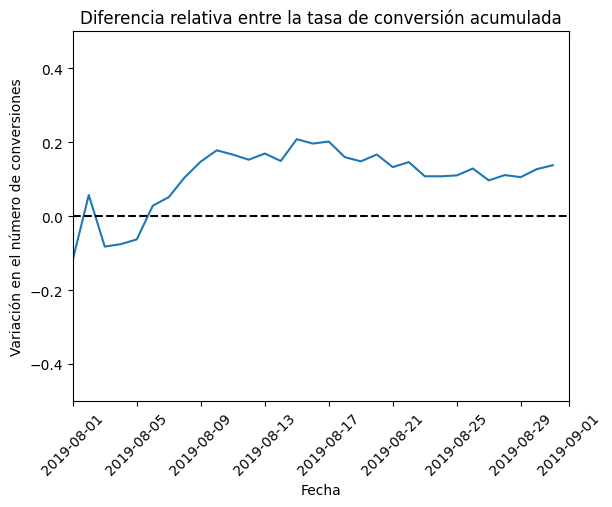

In [54]:
#unimos los datos de conversion
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.xticks(rotation=45)
plt.title('Diferencia relativa entre la tasa de conversión acumulada')
plt.xlabel( 'Fecha')
plt.ylabel('Variación en el número de conversiones')
plt.axhline(y=0, color='black', linestyle='--')
plt.axis([pd.to_datetime("2019-08-01"), pd.to_datetime('2019-09-01'), -0.5, 0.5])

Observaciones: La diferencia relativa comienza en territorio negativo, lo que indica que el Grupo A tenía una tasa de conversión acumulada mayor que el Grupo B en los primeros días.
Se observa una rápida transición hacia valores positivos, lo que sugiere que el Grupo B experimentó un aumento significativo en su tasa de conversión acumulada.
Se observa cierta fluctuación, pero la diferencia se mantiene relativamente constante.
Al final la diferencia relativa muestra una ligera tendencia a la baja, lo que sugiere que las tasas de conversión acumuladas de ambos grupos se están acercando. Sin embargo, la diferencia se mantiene en valores positivos, lo que indica que el Grupo B sigue teniendo una tasa de conversión acumulada ligeramente mayor que el Grupo A al final del periodo.

### Detección de anomalías


#### 5. Dispersión del número de pedidos por usuario

Text(0, 0.5, 'Ordenes')

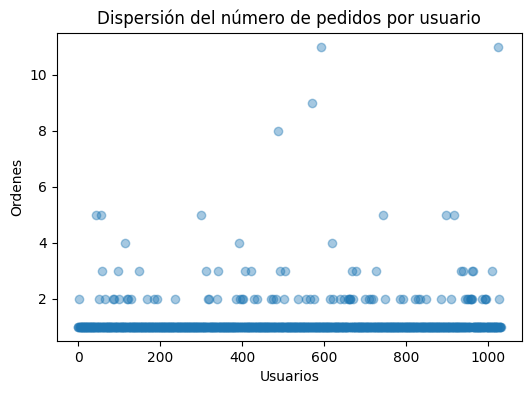

In [55]:
#Gráfico de dispersión del número de pedidos por usuario
orders_by_users = (orders.groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique})
)
orders_by_users.columns=['visitor_id', 'orders']
x_values_o = pd.Series(range(0,len(orders_by_users)))
plt.figure(figsize=(6,4))
plt.scatter(x_values_o, orders_by_users['orders'],alpha=0.4)
plt.title('Dispersión del número de pedidos por usuario')
plt.xlabel('Usuarios')
plt.ylabel('Ordenes')

Observaciones: La mayoría de los puntos se encuentran en la parte inferior del gráfico, cerca de 1 orden. Esto indica que la gran mayoría de los usuarios ha realizado solo un pedido.
Hay algunos puntos dispersos a lo largo del gráfico, lo que indica que algunos usuarios han realizado más de un pedido.
Se observan algunos valores atípicos (outliers) con un número significativamente mayor de pedidos.

#### 6. Percentiles 90, 95 y 99 del número de pedidos por usuario

In [56]:
print("Percentiles 90/95/99 para el número de ordenes:",np.percentile(orders_by_users['orders'], [90, 95, 99]))

Percentiles 90/95/99 para el número de ordenes: [1. 2. 4.]


Observaciones: No más del 5% de los usuarios realizaron más de 2 pedidos y no mas del 1% de los usuarios realizaron más de 4. 

#### 7. Dispersión de los precios de los pedidos

Text(0, 0.5, 'Ingresos')

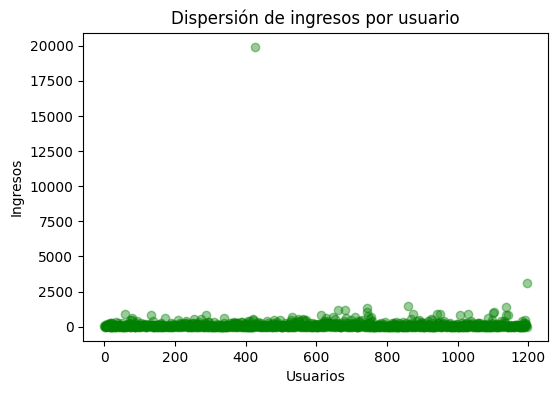

In [57]:
#Gráfico de dispersión de los precios de los pedidos*
x_values_r = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(6,4))
plt.scatter(x_values_r,orders['revenue'], alpha=0.4, color='green')
plt.title('Dispersión de ingresos por usuario')
plt.xlabel('Usuarios')
plt.ylabel('Ingresos')

Observaciones: La gran mayoría de los puntos se agrupan en la parte inferior del gráfico. Esto indica que la mayoría de los usuarios generan ingresos bajos.
Hay algunos puntos dispersos a lo largo del gráfico, lo que indica que algunos usuarios generan ingresos más altos.
Se observan dos valores atípicos notables, un usuario con ingresos cercanos a 20000 y otro con ingresos cercanos a 3000.

#### 8. Percentiles 90, 95 y 99 de los precios de los pedidos

In [58]:
print("Percentiles 90/95/99 para los ingresos:",np.percentile(orders['revenue'], [90, 95,99]))

Percentiles 90/95/99 para los ingresos: [282.48  435.54  900.904]


Observaciones: No más del 5% de los pedidos cuestan más de $435.54 y no más del 1% cuestan más de $900.904.

#### 9. Significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto.  

In [59]:
#Crer las variables para almacenar los usuarios con al menos un pedido,
#  indicaremos el número de pedidos realizados
orders_by_usersA = orders[orders['group']=='A'].groupby(
    'visitor_id', as_index=False).agg(
        {'transaction_id' : pd.Series.nunique})
orders_by_usersA.columns = ['visitor_id', 'orders']

orders_by_usersB = orders[orders['group']=='B'].groupby(
    'visitor_id', as_index=False).agg(
        {'transaction_id' : pd.Series.nunique})
orders_by_usersB.columns = ['visitor_id', 'orders']

#Declar las variables sampleA y sampleB con usuarios de diferentes grupos y 
# números de pedidos correspondientes. Los que no pidieron nada tendrán un 0. 
sampleA = pd.concat([orders_by_usersA['orders'],pd.Series(0, index=np.arange(
    visits[visits['group']=='A']['visits'].sum() - len(orders_by_usersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([orders_by_usersB['orders'],pd.Series(0, index=np.arange(
    visits[visits['group']=='B']['visits'].sum() - len(orders_by_usersB['orders'])), name='orders')],axis=0)

In [60]:
#calcular la importancia estadística de la diferencia en la conversion de los segmentos
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.017
0.138


Observaciones: Como el valor p es menor a 0.05, se puede rechazar la hipótesis nula con un nivel de confianza del 95%.
Esto sugiere que hay una diferencia estadísticamente significativa entre las distribuciones de sampleA y sampleB.
sampleB tiene una media 13.8% mayor que sampleA, como este valor es positivo significa que sampleB es mayor en promedio

#### 10. Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto.

In [61]:
#Diferencia relativa en el tamaño promedio de pedido entre los grupos:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.692
0.252


Observaciones: Como el valor p es mucho mayor que 0.05, no hay suficiente evidencia estadística para afirmar que los grupos A y B tienen distribuciones de ingresos significativamente diferentes.

El revenue promedio del grupo B es 25.2% mayor que el del grupo A.
Sin embargo, como el valor p es alto, este incremento no es estadísticamente significativo.

#### 11. Significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados

In [62]:
#Número total de usuarios anómalos
threshold_orders = np.percentile(orders_by_users['orders'], 99)
threshold_revenue = np.percentile(orders['revenue'], 99)
usersWithManyOrders = pd.concat([orders_by_usersA[orders_by_usersA['orders'] > threshold_orders]['visitor_id'], orders_by_usersB[orders_by_usersB['orders'] > threshold_orders]['visitor_id']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > threshold_revenue]['visitor_id']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(f"Datós anómalos: {abnormalUsers.shape}")

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitor_id, dtype: int64
Datós anómalos: (15,)


In [63]:
#Filtrar los datos
sampleAFiltered = pd.concat([orders_by_usersA[np.logical_not(orders_by_usersA['visitor_id'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(orders_by_usersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([orders_by_usersB[np.logical_not(orders_by_usersB['visitor_id'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(orders_by_usersB['orders'])),name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.014
0.153


Observaciones: El valor p es menor a 0.05, lo que indica que hay una diferencia estadísticamente significativa entre las distribuciones del número de pedidos por usuario entre los grupos A y B.
Es decir, podemos rechazar la hipótesis nula y concluir que las distribuciones de los pedidos en los dos grupos son diferentes.

El número promedio de pedidos por usuario en el grupo B es un 15.3% mayor que en el grupo A.
Este incremento es estadísticamente significativo, lo que sugiere que, en promedio, el grupo B tiene más pedidos que el grupo A

#### 12. Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados

In [64]:
# valor p calculado con la prueba U de Mann-Whitney
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',  # Seleccionar datos en el grupo A
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
            # Excluir los usuarios anormales y selecciona los datos de ingreso para el grupo A
    orders[np.logical_and(
        orders['group']=='B',  # Seleccionar datos en el grupo B
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue']  # Excluye los usuarios anormales y selecciona los datos de ingreso para el grupo B
)[1]))  # Extraer el valor p de los resultados de la prueba

# Diferencia relativa en el ingreso medio entre los grupos B y A
print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',  # Selecciona datos en el grupo B
           np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() /  # Calcula el ingreso medio para el grupo B
    orders[np.logical_and(orders['group']=='A',  # Selecciona datos en el grupo A
           np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1))  # Calcula el ingreso medio para el grupo A y muestra la diferencia relativa          

0.819
-0.006


Observaciones: No hay una diferencia estadísticamente significativa entre las distribuciones de ingresos de los grupos A y B. *
Como el valor p es mucho mayor que 0.05, no podemos rechazar la hipótesis nula. Esto sugiere que las distribuciones de ingresos de ambos grupos podrían ser similares

El ingreso promedio en el grupo B es 0.6% menor que en el grupo A.
La diferencia es muy pequeña y negativa, lo que indica que el grupo B tiene un ingreso promedio ligeramente menor que el grupo A. Sin embargo, como ya se mencionó, esta diferencia no es estadísticamente significativa.

#### 13.  Toma de decision
El valor p 0.819 es mucho mayor que el umbral típico de 0.05, lo que indica que no hay una diferencia estadísticamente significativa entre los ingresos de los grupos A y B.
Aunque hay una ligera diferencia en los ingresos (-0.6%), es mínima. 

Basándonos en estos hechos, podemos concluir que la prueba no fue exitosa y debe pararse ya que no hay una diferencia estadísticamente significativa.